In [1]:
#IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
#READ DATASETS; The train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Since test does not have the Survived column and it will show null, repalce all null with -999 
test['Survived'] = -999

In [4]:
#concatenate both train and test and check the shape of both
df = pd.concat([train,test])
df.shape, train.shape, test.shape

((1309, 12), (891, 12), (418, 12))

In [5]:
#validate the concatenation
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,-999,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,-999,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,-999,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,-999,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,-999,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


EXPLORATIVE DATA ANALYSIS

In [6]:
#To explore the Data, Microsoft PowerBI is used and visualized below 
from IPython.display import IFrame
Iframe = IFrame(src="https://app.powerbi.com/view?r=eyJrIjoiZDE1MzQyMWQtZWU1ZS00NjM5LWI1MGItNWE2MDgwMGNhZDc3IiwidCI6IjMyNzk2YmUyLTYwZmItNGRhMi04ZDI2LTA2ZTU5MzhlNmU2YiIsImMiOjh9", height=636, width=800)
Iframe

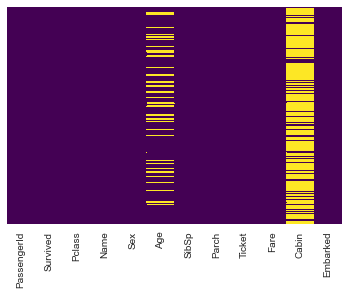

In [7]:
#check for null values in whole dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,-318.747135,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,466.107167,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,-999.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,-999.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.807512,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.807512,1.000000,0.023748,-0.018584,0.033840,-0.005739,-0.030655
Pclass,-0.038354,0.023748,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.018584,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,0.033840,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,-0.005739,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,-0.030655,-0.558629,0.178740,0.160238,0.221539,1.000000


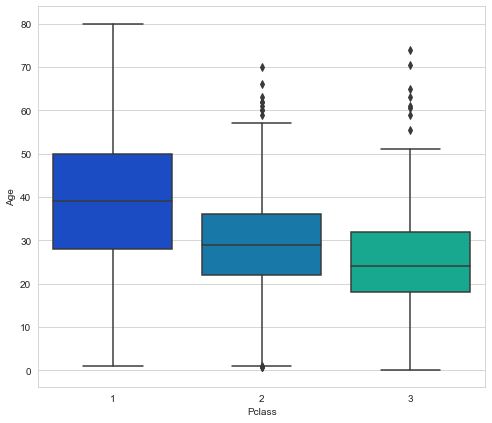

In [10]:
#before cleaning the Age column, explore it along with the Pclass column
plt.figure(figsize=(8, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [12]:
#fit the function on the dataset
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

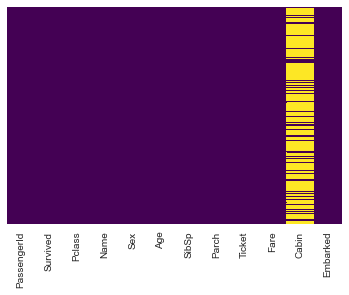

In [13]:
#validate the Age column again
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
#drop the cabin column since the quantity of null values is outrageous
df.drop('Cabin',axis=1,inplace=True)

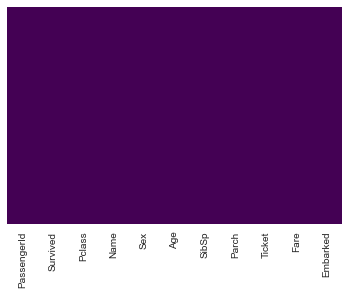

In [15]:
#validate the dropping
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
#check for any other null values in the dataset
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

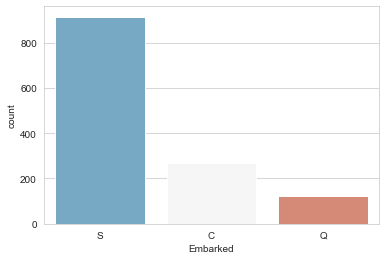

In [17]:
#get the mode value of the Embarked column 
sns.countplot(x='Embarked',data=df,palette='RdBu_r')
#another method to get the mode is 'print(df['Embarked'].mode())'

In [18]:
#fill the null values in Fare with 9 and the Embarked with 'S'
df.fillna({'Fare':9, 'Embarked': 'S'}, inplace=True)

In [19]:
#validate the null values again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
#drop the Ticket column
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [21]:
#check the shape of the dataframes
df.shape, train.shape, test.shape

((1309, 9), (891, 12), (418, 12))

In [22]:
#split the data into train and test
df_train = df[:len(train)]
df_test = df[len(train):]

In [23]:
#validate the split
df_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,-999,3,male,34.5,0,0,7.8292,Q
1,893,-999,3,female,47.0,1,0,7.0000,S
2,894,-999,2,male,62.0,0,0,9.6875,Q
3,895,-999,3,male,27.0,0,0,8.6625,S
4,896,-999,3,female,22.0,1,1,12.2875,S


In [24]:
#To grab only the needed columns from a df
features = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']
x_train = df_train[features]
x_test = df_test[features]
y_train = train[['Survived']]

In [25]:
#One-hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [26]:
#fit encoder on new x_train and x_test
trans = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['Sex', 'Embarked'])], remainder='passthrough')

dx_train = np.array(trans.fit_transform(x_train))
dx_test = np.array(trans.fit_transform(x_test))

In [27]:
#convert y_train properlly for prediction
y_train = y_train.values.ravel()

In [28]:
#build the Logistic Regressio model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(dx_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
#predict y_test using the x_test values
y_test = LR.predict(dx_test)

In [30]:
#grab the Passenger Column form the test data
sub2 = df_test['PassengerId']

In [31]:
#verify the datatype of y_test
print(type(y_test))

<class 'numpy.ndarray'>


In [32]:
#verify the datatype of the Passenger Column
print(type(sub2))

<class 'pandas.core.series.Series'>


In [33]:
#convert the y_test to a Dataframe with the column #Survived
new_df = pd.DataFrame(y_test, columns = ['Survived'])
print(new_df)
print(type(new_df))

     Survived
0           0
1           0
2           0
3           0
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [34]:
#concatenate the Passenger Column with y_test
submission = pd.concat([sub2, new_df], axis=1)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [35]:
#convert submission to csv
submission.to_csv('submission.csv',index=False)

In [ ]:
#Model has 77% performance after submission on kaggle

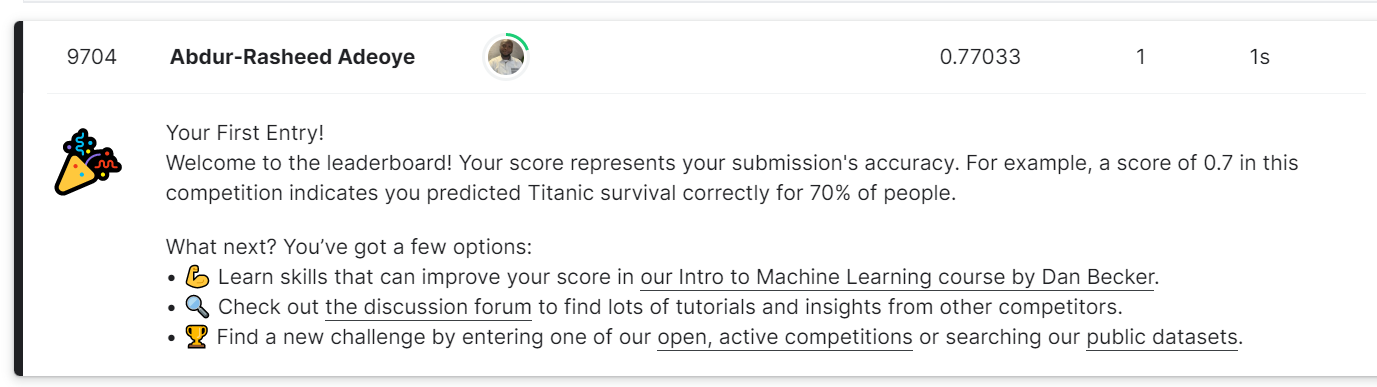

Await necessary feedback, thanks and do have a GREAT DAY!!!